In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
# load the provided data
train_features = pd.read_csv(
    "../data/raw/dengue_features_train.csv", index_col=[0, 1, 2]
)

train_labels = pd.read_csv(
    "../data/raw/dengue_labels_train.csv", index_col=[0, 1, 2]
)

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc["sj"]
sj_train_labels = train_labels.loc["sj"]

# Separate data for Iquitos
iq_train_features = train_features.loc["iq"]
iq_train_labels = train_labels.loc["iq"]

In [4]:
print("San Juan")
print("features: ", sj_train_features.shape)
print("labels  : ", sj_train_labels.shape)

print("\nIquitos")
print("features: ", iq_train_features.shape)
print("labels  : ", iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [5]:
sj_train_features.head()


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [6]:
sj_train_features.describe()


,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
std,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,1.294705,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,296.300000,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,297.500000,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,298.400000,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000


In [7]:
# Remove `week_start_date` string.
sj_train_features.drop("week_start_date", axis=1, inplace=True)
iq_train_features.drop("week_start_date", axis=1, inplace=True)

In [8]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [9]:
sj_train_features.isna().sum()

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [10]:
sj_train_features.shape
sj_train_features.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
std,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,1.294705,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,296.300000,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,297.500000,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,298.400000,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000


In [11]:
iq_train_features.isna().sum()

ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

Text(0.5, 0, 'Time')

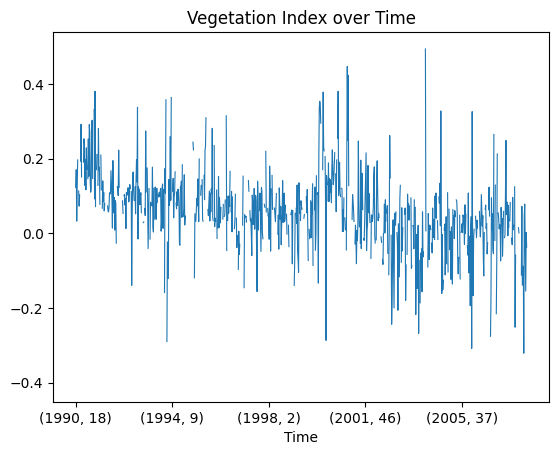

In [12]:
(sj_train_features.ndvi_ne.plot.line(lw=0.8))

plt.title("Vegetation Index over Time")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

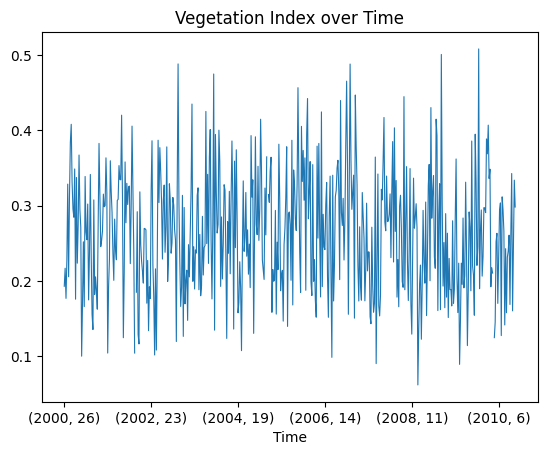

In [13]:
(iq_train_features.ndvi_ne.plot.line(lw=0.8))

plt.title("Vegetation Index over Time")
plt.xlabel("Time")

In [14]:
sj_train_features.fillna(method="ffill", inplace=True)
iq_train_features.fillna(method="ffill", inplace=True)

In [15]:
# df1 = df.dropna(axis=0, how='any')  # Drop rows with any NaN values
sj_train_features.isna().sum()
# iq_train_features.isna().sum()
# sj_train_features.shape
# iq_train_features.shape
# sj_train_features.describe()
# iq_train_features.describe()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## Distribution of labels


In [16]:
print("San Juan")
print("mean: ", sj_train_labels.mean()[0])
print("var :", sj_train_labels.var()[0])

print("\nIquitos")
print("mean: ", iq_train_labels.mean()[0])
print("var :", iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

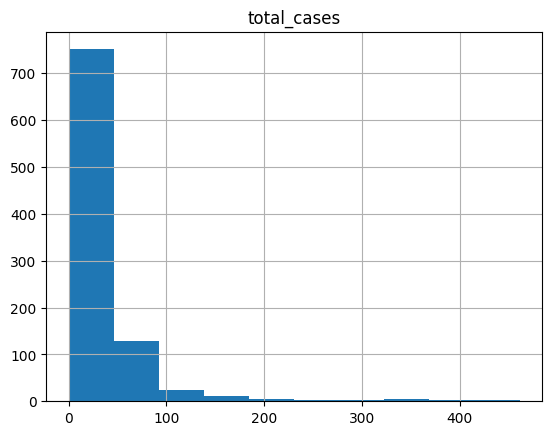

In [17]:
sj_train_labels.hist()

array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

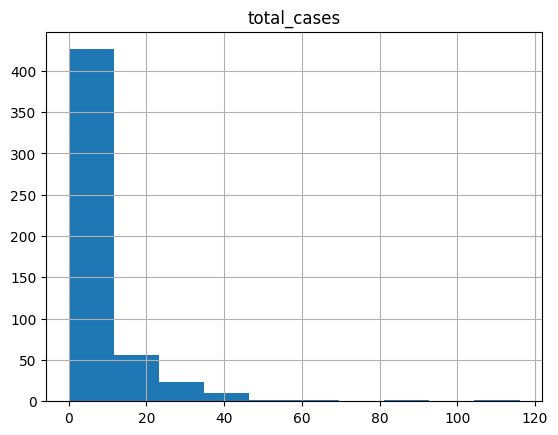

In [18]:
iq_train_labels.hist()

In [19]:
sj_train_features["total_cases"] = sj_train_labels.total_cases
iq_train_features["total_cases"] = iq_train_labels.total_cases

In [20]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

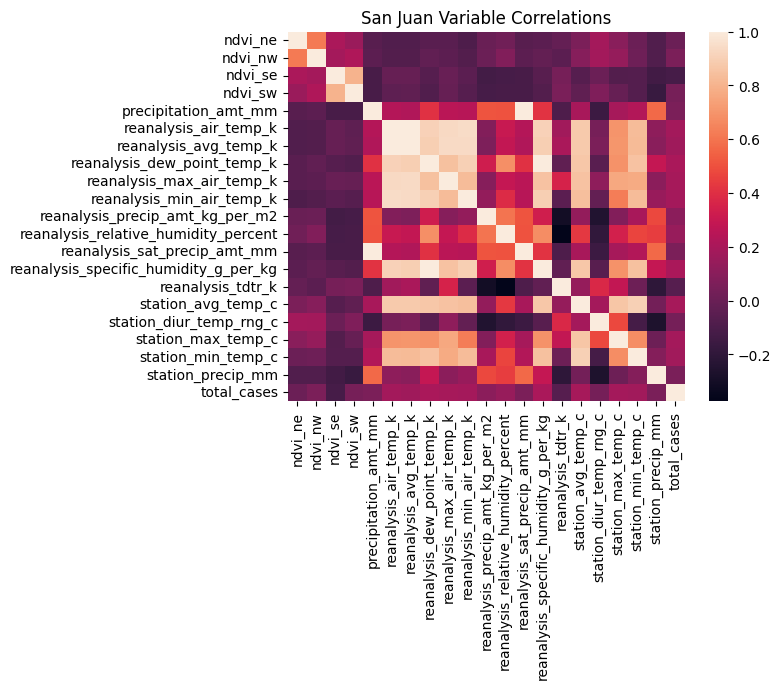

In [21]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title("San Juan Variable Correlations")

Text(0.5, 1.0, 'Iquitos Variable Correlations')

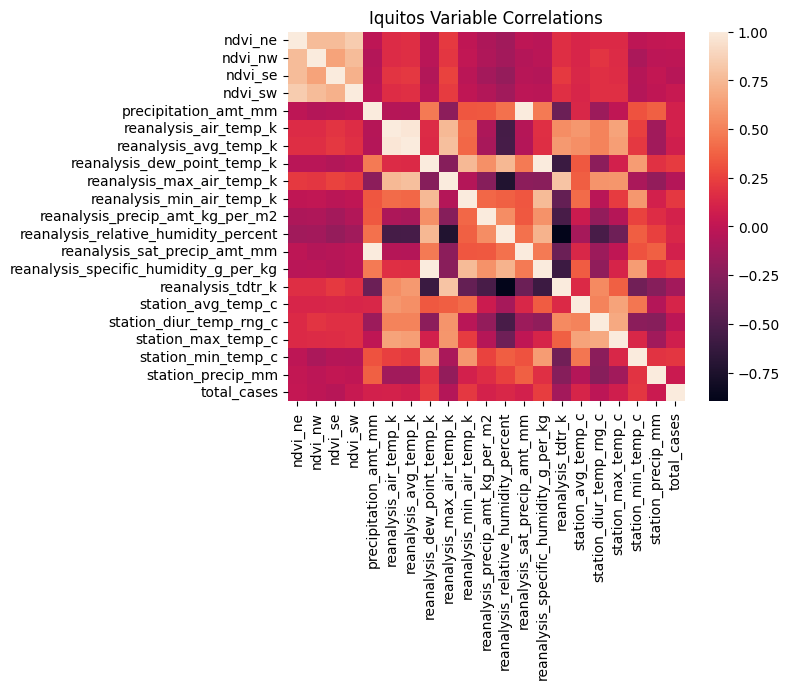

In [22]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title("Iquitos Variable Correlations")

<Axes: >

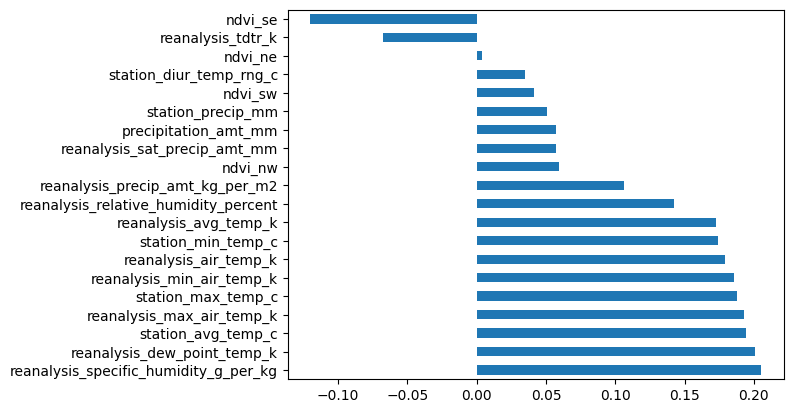

In [23]:
# San Juan
(
    sj_correlations.total_cases.drop("total_cases")  # don't compare with myself
    .sort_values(ascending=False)
    .plot.barh()
)

<Axes: >

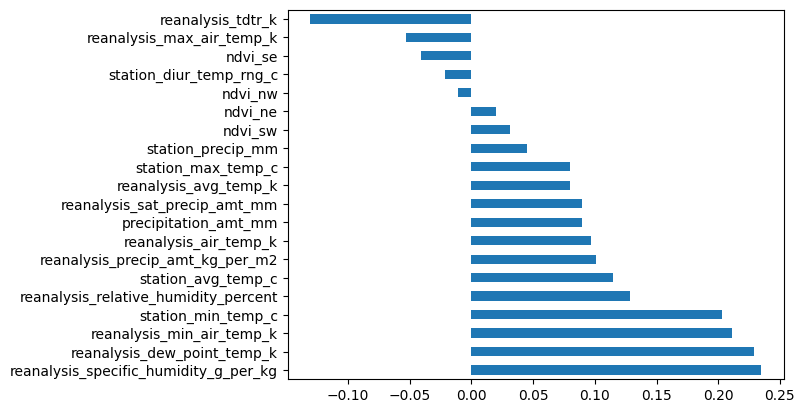

In [24]:
# Iquitos
(
    iq_correlations.total_cases.drop("total_cases")  # don't compare with myself
    .sort_values(ascending=False)
    .plot.barh()
)

The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. This makes sense: we know mosquitos thrive wet climates, the wetter the better!

# good variables
#### reanalysis_specific_humidity_g_per_kg
#### reanalysis_dew_point_temp_k
#### station_avg_temp_c
#### station_min_temp_c

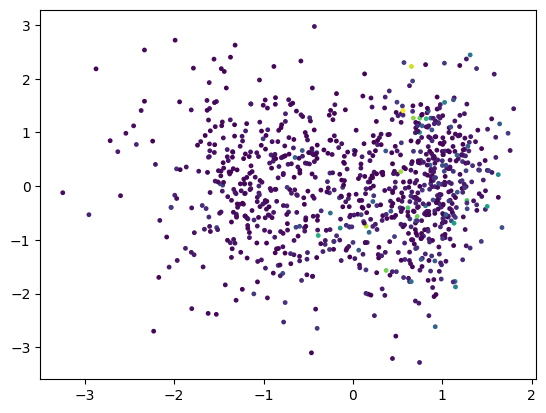

In [25]:
from sklearn.decomposition import PCA
# select features we want
features = [
    "reanalysis_specific_humidity_g_per_kg",
    "reanalysis_dew_point_temp_k",
    "station_avg_temp_c",
    "station_min_temp_c",
]

pca = PCA(n_components=2, whiten=True)
# San Juan 
df_sj_top = sj_train_features[features]
tr_sj = pca.fit_transform(df_sj_top)  # Exclude non-feature columns
plt.scatter(tr_sj[:, 0], tr_sj[:, 1], c=sj_train_features.total_cases, cmap="viridis", s=6)


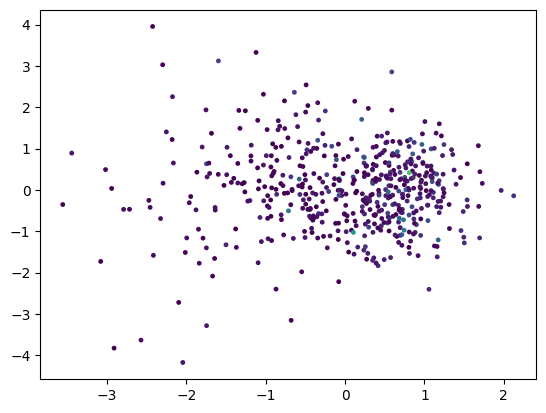

In [26]:
# Iquitos
df_iq_top = iq_train_features[features]
tr_iq = pca.fit_transform(df_iq_top)  # Exclude non-feature columns
plt.scatter(tr_iq[:, 0], tr_iq[:, 1], c=iq_train_features.total_cases, cmap="viridis", s=6)

<Axes: xlabel='year,weekofyear'>

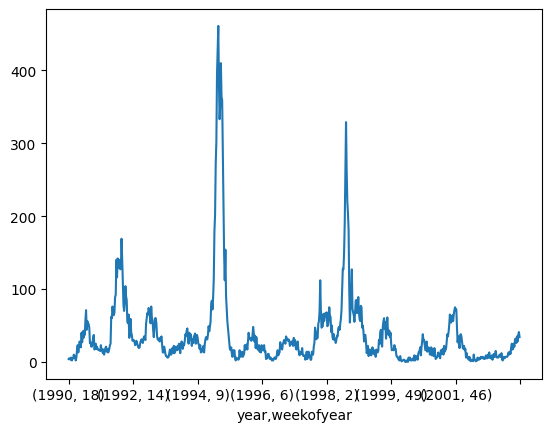

In [51]:
idx_sj = 700
sj_train_features["total_cases"][:idx_sj]  # Show first 10 values of total_cases
sj_train_features["total_cases"][:idx_sj].plot.line()

<Axes: xlabel='year,weekofyear'>

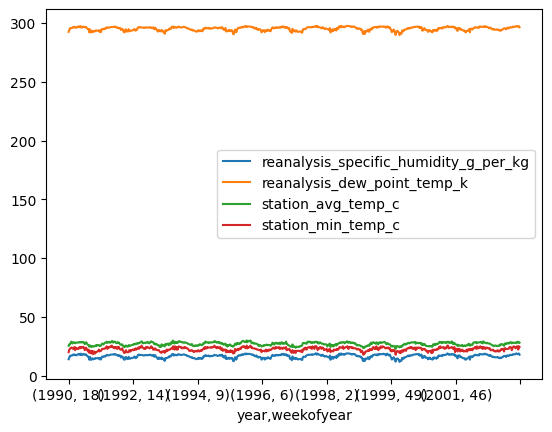

In [52]:
sj_train_features[features][:idx_sj].plot.line()

In [29]:
X_sj_train_features = sj_train_features.drop("total_cases", axis=1)
y_sj_train_features = sj_train_features["total_cases"]
X_iq_train_features = iq_train_features.drop("total_cases", axis=1)
y_iq_train_features = iq_train_features["total_cases"]

<Axes: xlabel='year,weekofyear'>

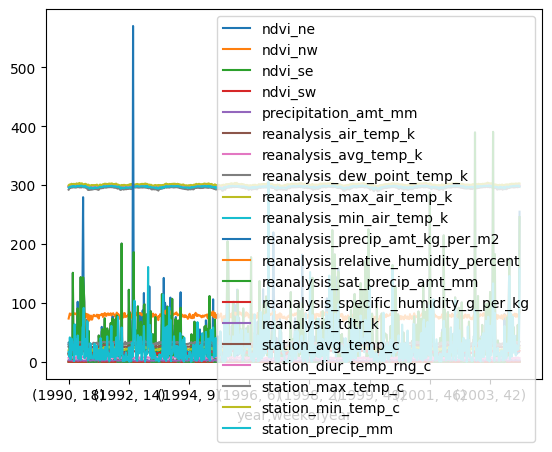

In [30]:
X_sj_train_features[:][:idx_sj].plot.line()

# SJ City

In [55]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# X = sj_train_features[features][:idx_sj]
X = X_sj_train_features[:][:idx_sj]
y = sj_train_features['total_cases'][:idx_sj]

# X[features] = scale.fit_transform(X[features].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

                 const   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                  
1990 18            1.0  0.122600  0.103725  0.198483  0.177617   
     19            1.0  0.169900  0.142175  0.162357  0.155486   
     20            1.0  0.032250  0.172967  0.157200  0.170843   
     21            1.0  0.128633  0.245067  0.227557  0.235886   
     22            1.0  0.196200  0.262200  0.251200  0.247340   
...                ...       ...       ...       ...       ...   
2003 37            1.0  0.094450 -0.013520  0.240700  0.241929   
     38            1.0 -0.093900  0.086425  0.248900  0.224743   
     39            1.0 -0.087400  0.097250  0.254571  0.211914   
     40            1.0 -0.087400  0.015100  0.217486  0.208814   
     41            1.0  0.020400  0.032750  0.163443  0.110371   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18      

In [58]:
# X = sj_train_features[features][idx_sj+1:]
X = X_sj_train_features[:][idx_sj+1:]

# X = sj_test_features[features]
# X[features] = scale.fit_transform(X[features].values)

X = sm.add_constant(X)

print(X)
predicted = est.predict(X).astype(int)
print(predicted)

                 const  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                 
2003 43            1.0 -0.04160  0.055300  0.169929  0.128171   
     44            1.0  0.08920  0.000350  0.094650  0.088114   
     45            1.0  0.08920  0.163500  0.137717  0.124800   
     46            1.0  0.06925  0.055375  0.065486  0.074886   
     47            1.0 -0.21795  0.015000  0.128143  0.135014   
...                ...      ...       ...       ...       ...   
2008 13            1.0  0.07785 -0.039900  0.310471  0.296243   
     14            1.0 -0.03800 -0.016833  0.119371  0.066386   
     15            1.0 -0.15520 -0.052750  0.137757  0.141214   
     16            1.0  0.00180 -0.052750  0.203900  0.209843   
     17            1.0 -0.03700 -0.010367  0.077314  0.090586   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2003 43                   

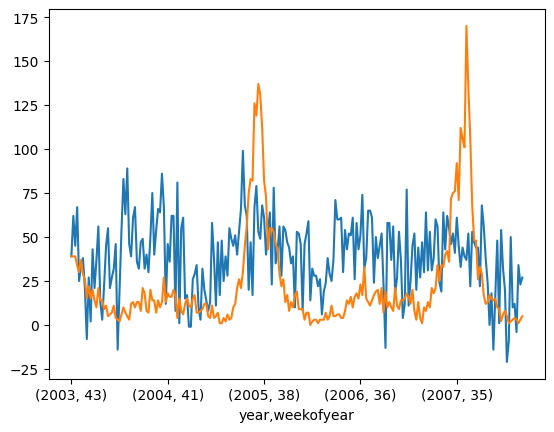

In [59]:
predicted.plot.line()
y_actual = sj_train_features['total_cases'][idx_sj+1:].plot.line()


In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


In [35]:
# model = sm.OLS().fit()
# scores_sj = cross_validate(model, X_sj_train_features, y_sj_train_features, cv=3,
#                         scoring=('r2', 'neg_mean_squared_error'),
#                         return_train_score=True)
# print(scores_sj['test_neg_mean_squared_error'])
# print(scores_sj['train_r2'])

# IQ city

In [60]:
idx_iq = 350

# X = iq_train_features[features][:idx_iq]
X = X_iq_train_features[:][:idx_iq]
y = iq_train_features['total_cases'][:idx_iq]

# X[features] = scale.fit_transform(X[features].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

                 const   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                  
2000 26            1.0  0.192886  0.132257  0.340886  0.247200   
     27            1.0  0.216833  0.276100  0.289457  0.241657   
     28            1.0  0.176757  0.173129  0.204114  0.128014   
     29            1.0  0.227729  0.145429  0.254200  0.200314   
     30            1.0  0.328643  0.322129  0.254371  0.361043   
...                ...       ...       ...       ...       ...   
2007 8             1.0  0.257014  0.118233  0.179086  0.237229   
     9             1.0  0.173500  0.199633  0.174500  0.165917   
     10            1.0  0.216000  0.213600  0.188914  0.227529   
     11            1.0  0.303317  0.285033  0.257143  0.292614   
     12            1.0  0.213240  0.223129  0.264371  0.221829   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26      

In [61]:
# X = iq_train_features[features][idx_iq+1:]
X = X_iq_train_features[:][idx_iq+1:]

# X = iq_test_features[features]
# X[features] = scale.fit_transform(X[features].values)

X = sm.add_constant(X)

print(X)
predicted = est.predict(X).astype(int)
print(predicted)

                 const   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                  
2007 14            1.0  0.238100  0.191200  0.274957  0.273800   
     15            1.0  0.152517  0.149486  0.229414  0.157557   
     16            1.0  0.143086  0.207157  0.168457  0.274314   
     17            1.0  0.271371  0.183657  0.203000  0.300600   
     18            1.0  0.194714  0.154100  0.295714  0.173086   
...                ...       ...       ...       ...       ...   
2010 21            1.0  0.342750  0.318900  0.256343  0.292514   
     22            1.0  0.160157  0.160371  0.136043  0.225657   
     23            1.0  0.247057  0.146057  0.250357  0.233714   
     24            1.0  0.333914  0.245771  0.278886  0.325486   
     25            1.0  0.298186  0.232971  0.274214  0.315757   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2007 14      

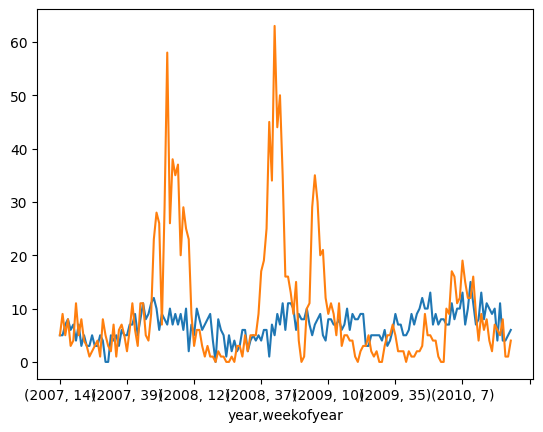

In [62]:
predicted.plot.line()
y_actual = iq_train_features['total_cases'][idx_iq+1:].plot.line()

# apply on the test data

In [74]:
# load the provided data
test_features = pd.read_csv(
    "../data/raw/dengue_features_test.csv", index_col=[0, 1, 2]
)

# Seperate data for San Juan
sj_test_features = test_features.loc["sj"]

# Separate data for Iquitos
iq_test_features = test_features.loc["iq"]

print("San Juan")
print("features: ", sj_test_features.shape)

print("\nIquitos")
print("features: ", iq_test_features.shape)

San Juan
features:  (260, 21)

Iquitos
features:  (156, 21)


In [75]:
# Remove `week_start_date` string.
sj_test_features.drop("week_start_date", axis=1, inplace=True)
iq_test_features.drop("week_start_date", axis=1, inplace=True)

In [76]:
sj_test_features.fillna(method="ffill", inplace=True)
iq_test_features.fillna(method="ffill", inplace=True)

In [81]:
sj_test_features.shape, iq_test_features.shape

((260, 20), (156, 20))

In [79]:
# sj_test_features.isna().sum()
# iq_test_features.isna().sum()

In [92]:
X = sj_test_features[:]
# X[features] = scale.fit_transform(X[features].values)

X = sm.add_constant(X)

print(X)
sj_predictions = est.predict(X).astype(int)
print(sj_predictions)




                 const  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                 
2008 18            1.0 -0.01890 -0.018900  0.102729  0.091200   
     19            1.0 -0.01800 -0.012400  0.082043  0.072314   
     20            1.0 -0.00150 -0.012400  0.151083  0.091529   
     21            1.0 -0.00150 -0.019867  0.124329  0.125686   
     22            1.0  0.05680  0.039833  0.062267  0.075914   
...                ...      ...       ...       ...       ...   
2013 13            1.0 -0.08740 -0.016183  0.156343  0.105186   
     14            1.0 -0.20325 -0.077833  0.204171  0.178914   
     15            1.0 -0.11760 -0.008200  0.192700  0.170429   
     16            1.0  0.08275  0.031200  0.135014  0.074857   
     17            1.0 -0.08730 -0.048667  0.129814  0.117671   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2008 18                   

In [94]:
sj_predictions.to_csv(
    "../data/processed/sj_predictions.csv",
    header=True,
    index=False,
)

In [95]:
X = iq_test_features[:]
# X[features] = scale.fit_transform(X[features].values)

X = sm.add_constant(X)

print(X)
iq_predictions = est.predict(X).astype(int)
print(iq_predictions)

                 const   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                  
2010 26            1.0  0.183783  0.142500  0.225129  0.150214   
     27            1.0  0.291657  0.272267  0.330700  0.320914   
     28            1.0  0.208543  0.366457  0.212629  0.255514   
     29            1.0  0.089286  0.063214  0.122057  0.081957   
     30            1.0  0.306100  0.327683  0.250086  0.267914   
...                ...       ...       ...       ...       ...   
2013 22            1.0  0.301471  0.380029  0.280629  0.383186   
     23            1.0  0.247600  0.296343  0.285371  0.350357   
     24            1.0  0.238729  0.251029  0.252586  0.249771   
     25            1.0  0.310429  0.302700  0.406614  0.403943   
     26            1.0  0.339467  0.240071  0.356943  0.273600   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2010 26      

In [96]:
iq_predictions.to_csv(
    "../data/processed/iq_predictions.csv",
    header=True,
    index=False,
)

In [98]:
sj_predictions.values

array([ 5,  7, 10,  9, 10,  8,  9, 10, 12, 12,  9, 12, 11, 12, 13, 16, 12,
       13, 15,  9, 12,  4,  8, 13, 10,  6, 11, 11, 11, 10,  8,  4,  5,  6,
        5,  8,  3,  7,  6,  7,  6,  4,  4,  5,  4,  5,  4,  4,  5,  5,  7,
        6,  6,  7,  7,  7, 10,  9, 10, 12, 11, 12, 11, 14, 13, 13, 13, 13,
       12, 15, 13, 11, 15, 10, 14, 16, 15, 14, 11, 13, 10, 11, 11, 11, 10,
        9,  8,  8,  9,  6,  9,  8,  5,  8, 11,  7, 11,  7,  6,  9,  8,  6,
        6,  8, 11, 11, 11, 12, 13, 11, 14, 13, 11, 12, 15, 15, 11, 12, 15,
       17, 14, 14, 14, 17, 14, 16, 15, 14, 14, 13, 10,  8,  9,  6,  4,  5,
       10,  7,  6,  6,  4,  7,  5,  4,  3,  4,  5,  4,  4,  3,  3,  1,  4,
        7,  5,  5,  7,  7,  5, -2,  2, 11,  9, 10, 13, 11, 12, 11, 11, 13,
       12, 11, 12, 12, 12, 12, 15,  9, 10, 12, 11, 12, 11, 13,  8,  7,  9,
        7,  7,  2,  7,  6,  6,  4,  5,  5,  4,  3,  6,  0,  4,  4,  3,  3,
        3,  4,  8,  5,  6,  9,  7, 10, 11,  8, 12, 12, 12, 14, 12, 10, 14,
       13, 13, 11, 14, 14

In [103]:
    submission = pd.read_csv("../data/processed/submission_format.csv", index_col=[0, 1, 2])
    
    submission.total_cases = np.concatenate([sj_predictions.values, iq_predictions.values])
    submission.to_csv("../data/processed/benchmark_h.csv")

# Time-based cross-validation
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#sphx-glr-auto-examples-applications-plot-cyclical-feature-engineering-py


In [46]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv_sj = TimeSeriesSplit(
    n_splits=5,
    gap=1,
    max_train_size=800,
    test_size=100,
)

ts_cv_iq = TimeSeriesSplit(
    n_splits=5,
    gap=1,
    max_train_size=400,
    test_size=100,
)

In [47]:
sj_train_features["total_cases"]

year  weekofyear
1990  18            4
      19            5
      20            4
      21            3
      22            6
                   ..
2008  13            4
      14            3
      15            1
      16            3
      17            5
Name: total_cases, Length: 936, dtype: int64

In [48]:
# X = sj_train_features]  # Exclude the target variable
X= sj_train_features.drop("total_cases", axis=1)
y = sj_train_features["total_cases"]
all_splits = list(ts_cv_sj.split(X, y))
train_0, test_0 = all_splits[0]

In [49]:
X.iloc[train_0]
# X.iloc[test_0]

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   
...                   ...       ...       ...       ...                   ...   
1998 32          0.028667  0.057625  0.175857  0.152686                 25.79   
     33          0.053467  0.093500  0.185433  0.173900                 38.44   
     34          0.107200  0.056700  0.180967  0.172033                 24.34   
     35          0.030700  0.075750  0.154817  0.190257                 96.58   
     36          0.038800  0.054033  0.158543  0.145643                 47.74   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   
...                                ...                    ...   
1998 32                     300.662857             300.885714   
     33                     300.668571             300.621429   
     34                     300.367143             300.350000   
     35                     300.468571             300.578571   
     36                     300.687143             300.707143   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   
...                                      ...                        ...   
1998 32                           297.127143                      303.2   
     33                           297.457143                      303.1   
     34                           297.467143                      303.0   
     35                           297.401429                      303.1   
     36                           297.328571                      303.4   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                               
1990 18                              295.9                            32.00   
     19                              296.4                            17.94   
     20                              297.3                            26.10   
     21                              297.0                            13.90   
     22                              297.5                            12.20   
...                                    ...                              ...   
1998 32                              298.6                            27.70   
     33                              298.9                            55.90   
     34                              298.9                            63.20   
     35                              298.7                            98.30   
     36                              298.4                            52.50   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         


In [50]:
sj_train_features.reset_index()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2008,13,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,2008,14,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,2008,15,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,2008,16,0.001800,-0.052750,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
